In [37]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [38]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [39]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [40]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [41]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [42]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [43]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [44]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [55]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(most_recent_date)
# Used to I.D. what columns exist in data. 
inspector = inspect(engine)
columns = inspector.get_columns("measurement")
for x in columns:
    print(x["name"])

('2017-08-23',)
id
station
date
prcp
tobs


Text(0.5, 0, 'Date')

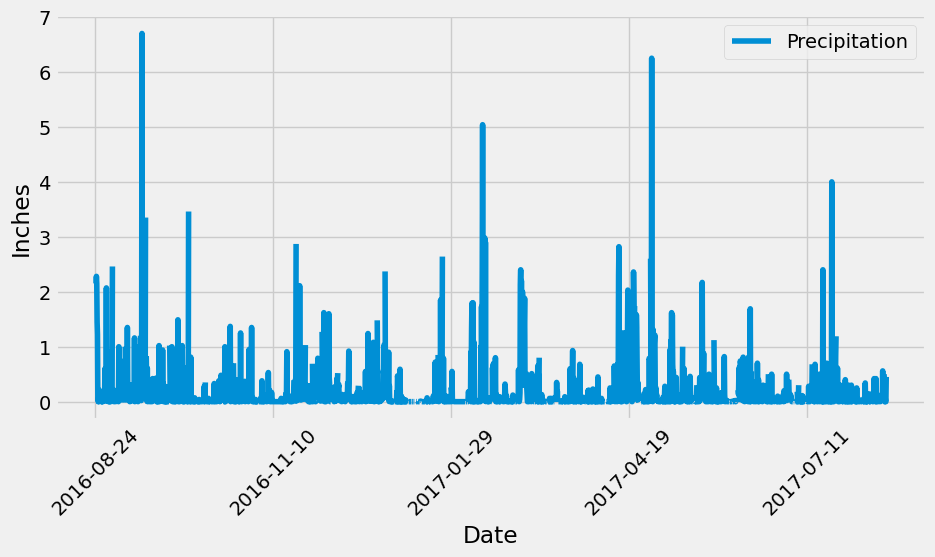

In [46]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_prior = dt.date(2017,8,23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
sel = [measurement.date,
       measurement.prcp]
data = session.query(*sel).\
    filter(measurement.date <= '2017-08-23').\
    filter(measurement.date > '2016-08-23')
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(data, columns=["date","prcp"])
prcp_df.set_index("date", inplace=True)
# Sort the dataframe by date
sorted_prcp = prcp_df.sort_values(by='date')
# Use Pandas Plotting with Matplotlib to plot the data
sorted_prcp.plot(figsize=(10, 5))
plt.legend(["Precipitation"])
plt.xticks(rotation = 45)
plt.ylabel("Inches")
plt.xlabel("Date")


In [47]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_365_day = prcp_df.groupby(["date"]).sum()
prcp_365_day.prcp.describe()

count    365.000000
mean       0.974164
std        1.776466
min        0.000000
25%        0.050000
50%        0.400000
75%        1.080000
max       14.280000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [48]:
# Design a query to calculate the total number stations in the dataset
conn = engine.connect()
measurement_df = pd.read_sql("measurement", conn)
measurement_df["station"].nunique()

9

In [49]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
measurement_df["station"].value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [50]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
USC00519281_data  = measurement_df[measurement_df["station"] == "USC00519281"]
max_temp = USC00519281_data["tobs"].max()
min_temp = USC00519281_data["tobs"].min()
avg_temp = USC00519281_data["tobs"].mean()

print(f"The max temp was {max_temp}")
print(f"The min temp was {min_temp}")
print(f"The mean temp was {avg_temp}")

The max temp was 85.0
The min temp was 54.0
The mean temp was 71.66378066378067


<AxesSubplot:>

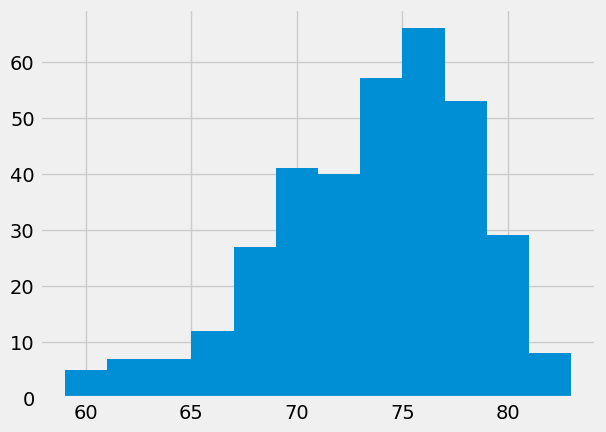

In [51]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
USC00519281_data_year = USC00519281_data[(USC00519281_data["date"] >= "2016-08-23") & (USC00519281_data["date"] <= "2017-08-23")]
USC00519281_data_year["tobs"].hist(bins=12)

# Close session

In [52]:
# Close Session
session.close()

In [53]:
inspector = inspect(engine)
columns = inspector.get_columns("station")
for x in columns:
    print(x["name"])

id
station
name
latitude
longitude
elevation


In [70]:
sel = [measurement.date,
        measurement.tobs]

    #Create List of Dictionaries
data2 = session.query(func.max(measurement.tobs)).\
        filter(measurement.date <= '2017-08-23').\
        filter(measurement.date > '2013-01-20').all()
data2[0][0]

87.0